In [2]:
%load_ext autoreload
%autoreload 2
%matplotlib inline

In [3]:
import numpy as np
import scipy.stats as stats
import scipy.signal
import numpy.matlib
import scipy.io
import matplotlib.pyplot as plt
from matplotlib.pyplot import cm 
from matplotlib import colors as mcolors

In [4]:
import re
import os
import sys

In [5]:
sys.path.append('../')

##  Loading up change detection modules

In [6]:
from changepy import pelt
from changepy.costs import normal_mean, poisson, exponential

In [7]:
from src.models import train_model
from src.features import build_features
from src.visualization import visualize

## Setting method params, stimulus encodings

In [8]:
# retinal data properties
stim_categories={'white': 3, 'fullfield' :0, 'multiscale':1, 'spatexp':2, 'spattempexp':2,'tempexp':4, 'natmov':1, 'scramnat':3, 'lowcont_white':3, 'lowcont_multiscale':1 }
firebrick=mcolors.CSS4_COLORS['firebrick']
red=mcolors.CSS4_COLORS['red']
coral=mcolors.CSS4_COLORS['coral']
seagreen=mcolors.CSS4_COLORS['seagreen']
grey=mcolors.CSS4_COLORS['grey']
royalblue=mcolors.CSS4_COLORS['royalblue']
color_ctgry=(grey, royalblue, red, coral, seagreen)
spat_corr={'grey': 'None', 'royalblue': 'Delta---', 'red':'Delta--', 'coral':'Delta-', 'seagreen':'None+' }

## Loading retinal data

In [9]:
dir=r'../Data/external/'
data_files=os.listdir(path=dir)

data_files=[ x for x in data_files if x.find('.mat') !=-1]

WARNING    ../src/features/build_features.py:28: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
  discrete_spikes = np.zeros(n_bins)
 [py.warnings]
WARNING    ../src/features/build_features.py:30: VisibleDeprecationWarning: non integer (and non boolean) array-likes will not be accepted as indices in the future
  discrete_spikes[spike_times] = 1
 [py.warnings]


(73, 2401098)
(40018, 73, 73)


WARNING    /Users/abhinav/anaconda/envs/py35/lib/python3.5/site-packages/matplotlib/cbook.py:136: MatplotlibDeprecationWarning: The set_color_cycle attribute was deprecated in version 1.5. Use set_prop_cycle instead.
  warnings.warn(message, mplDeprecation, stacklevel=1)
 [py.warnings]


white15_a
spattempexp15_a
white30_a
spattempexp30_a
(21, 1222081)
(20368, 21, 21)
fullfield_a
white64_a
fullfield_b
multiscale64_g
white64_b
multiscale64_h
(44, 1379585)
(22993, 44, 44)
fullfield_a
white64_a
multiscale64_g
fullfield_b
white64_b
multiscale64_h
(8, 1213699)


WARNING    /Users/abhinav/anaconda/envs/py35/lib/python3.5/site-packages/changepy/costs.py:167: RuntimeWarning: divide by zero encountered in log
  return -1*(t-s) * (np.log(t-s) - np.log(cumm[t] - cumm[s]))
 [py.warnings]


(20228, 8, 8)
white64_a
fullfield_a
multiscale64_g
white64_b
fullfield_b
multiscale64_h
(11, 1230586)
(20509, 11, 11)
white64_a
multiscale64_g
fullfield_a
white64_b
multiscale64_h
fullfield_b
(9, 1213943)
(20232, 9, 9)
white64_a
fullfield_a
multiscale64_g
white64_b
fullfield_b
multiscale64_h
(31, 1214595)
(20243, 31, 31)
white64_a
fullfield_a
multiscale64_g
white64_b
fullfield_b
multiscale64_h
spatexp64_a
spatexp64_b


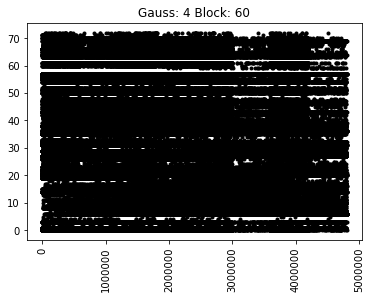

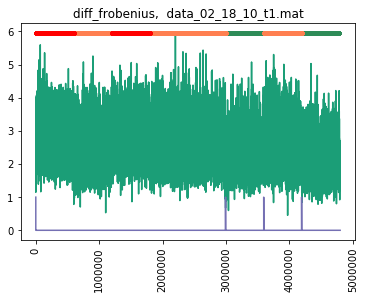

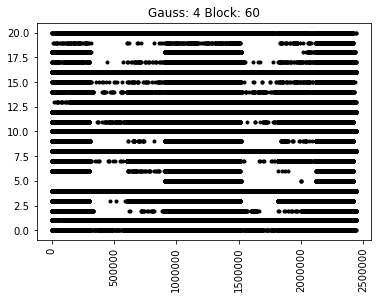

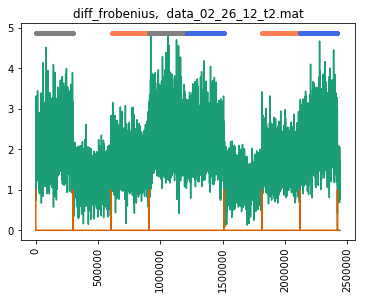

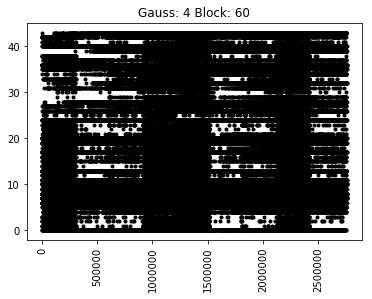

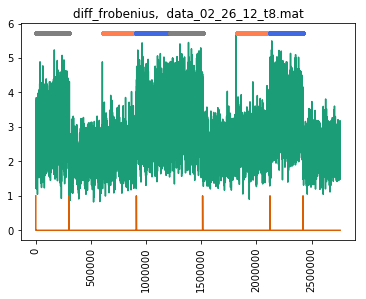

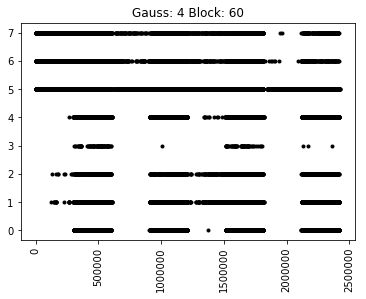

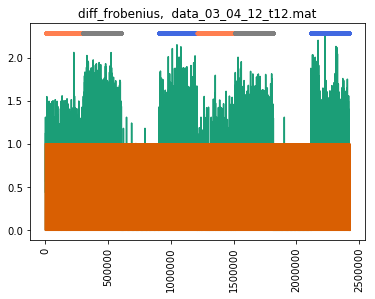

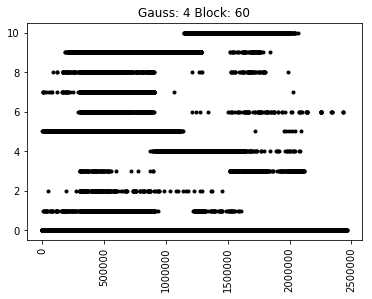

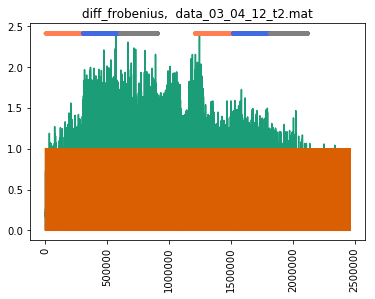

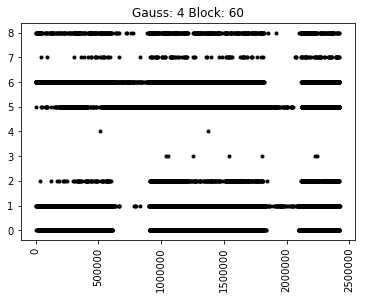

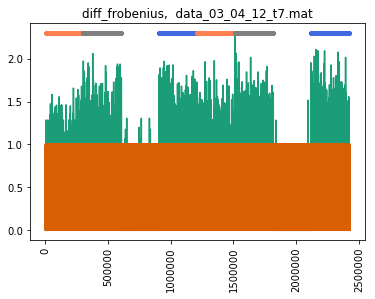

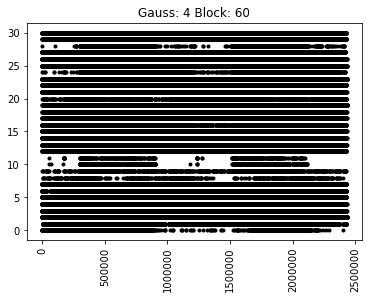

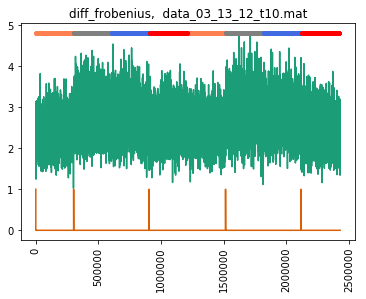

In [145]:
# setting up parameters
gauss_options=[2]
block_options=[60]

for file in data_files[2:9]:
    for gauss in gauss_options:
        for block in block_options:
            params={'res':2, 'block_width': block }
            params['gauss_width']=gauss * params['res']
            params['methods']=[ 'diff_frobenius']#'pop_sum', 'mean', 'diff_base', 'variation','frobenius', 
            res=params['res']
            block_width=params['block_width']
            gauss_width=params['gauss_width']

            #file='data_03_13_12_t6.mat'
            #file='data_03_13_12_t2'
            data_retina=scipy.io.loadmat(dir+file)
            data_retina['file']=file
            sum_diff_corr, stim=train_model.detect_changes(data_retina, params)
            #visualize.plot_cp_results(sum_diff_corr,stim, data_retina, params)
            plt.title('Gauss: ' + str(gauss_width) + ' Block: ' + str(block_width))

            summary_stat=sum_diff_corr['diff_frobenius']
            cp_exponential=pelt(exponential(summary_stat), len(summary_stat))
            time_pt=np.zeros(summary_stat.size * res * block_width)
            change_points=np.array(cp_exponential) * res * block_width
            visualize.plot_cp_results(sum_diff_corr,stim, data_retina, params)
            time_pt[change_points]=1
            plt.plot(time_pt)

../src/features/build_features.py:28: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
  discrete_spikes = np.zeros(n_bins)
../src/features/build_features.py:30: VisibleDeprecationWarning: non integer (and non boolean) array-likes will not be accepted as indices in the future
  discrete_spikes[spike_times] = 1


(67, 1213097)
(20218, 67, 67)


/Users/abhinav/anaconda/envs/py35/lib/python3.5/site-packages/matplotlib/cbook.py:136: MatplotlibDeprecationWarning: The set_color_cycle attribute was deprecated in version 1.5. Use set_prop_cycle instead.
  warnings.warn(message, mplDeprecation, stacklevel=1)


white64_a
fullfield_a
multiscale64_g
white64_b
fullfield_b
multiscale64_h
spatexp64_a
spatexp64_b
(33, 1235092)
(20584, 33, 33)
white64_a
fullfield_a
multiscale64_g
white64_b
fullfield_b
multiscale64_h
spatexp64_a
spatexp64_b
(58, 1235092)
(20584, 58, 58)
fullfield_a
multiscale64_g
white64_a
fullfield_b
multiscale64_h
white64_b
spatexp64_a
spatexp64_b
(26, 1219093)
(20318, 26, 26)
white64_a
fullfield_a
multiscale64_g
white64_b
fullfield_b
multiscale64_h
spatexp64_a
spatexp64_b
(20, 1213092)
(20218, 20, 20)
white64_a
fullfield_a
multiscale64_g
white64_b
fullfield_b
multiscale64_h
spatexp64_a
spatexp64_b
(21, 1224594)
(20410, 21, 21)
white64_a
fullfield_a
multiscale64_g
white64_b
fullfield_b
multiscale64_h
spatexp64_a
spatexp64_b


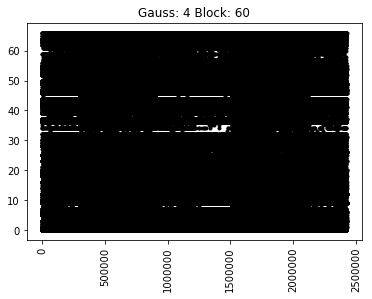

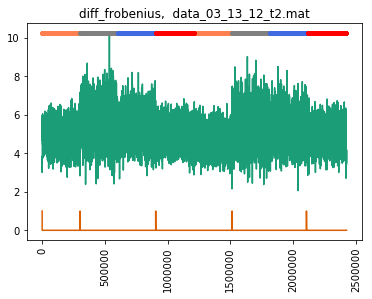

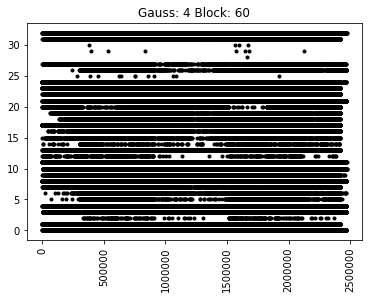

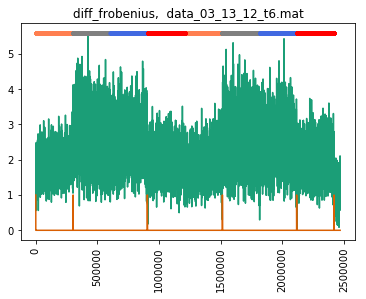

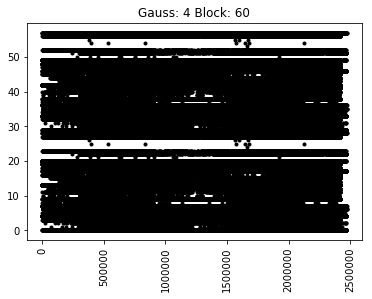

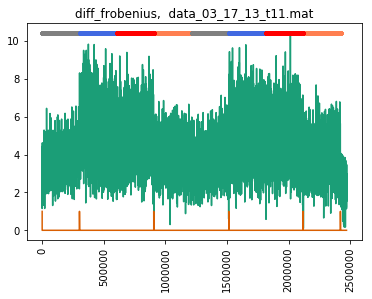

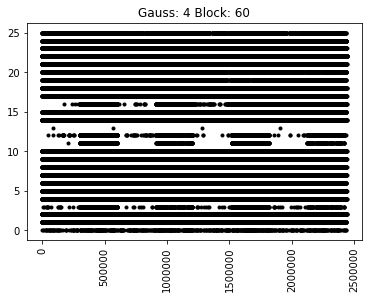

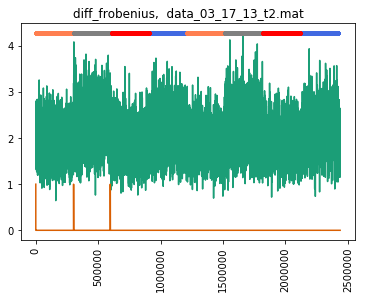

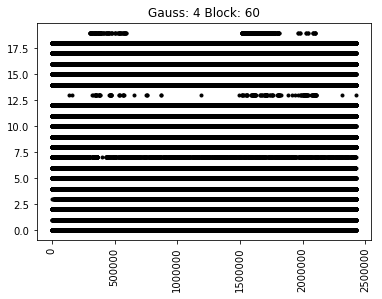

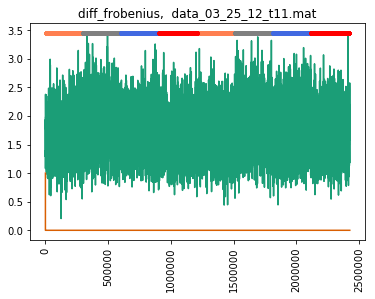

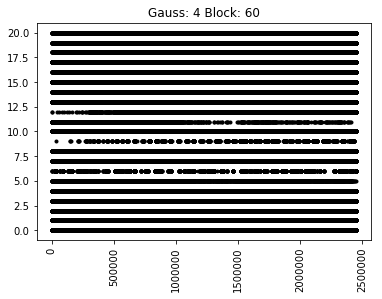

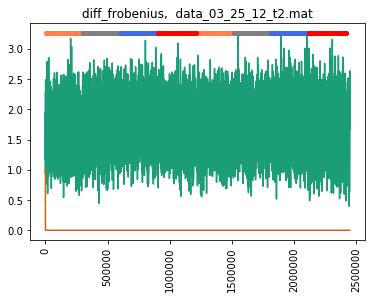

In [10]:
# setting up parameters
gauss_options=[2]
block_options=[60]

for file in data_files[9:15]:
    for gauss in gauss_options:
        for block in block_options:
            params={'res':2, 'block_width': block }
            params['gauss_width']=gauss * params['res']
            params['methods']=[ 'diff_frobenius']#'pop_sum', 'mean', 'diff_base', 'variation','frobenius', 
            res=params['res']
            block_width=params['block_width']
            gauss_width=params['gauss_width']

            #file='data_03_13_12_t6.mat'
            #file='data_03_13_12_t2'
            data_retina=scipy.io.loadmat(dir+file)
            data_retina['file']=file
            sum_diff_corr, stim=train_model.detect_changes(data_retina, params)
            #visualize.plot_cp_results(sum_diff_corr,stim, data_retina, params)
            plt.title('Gauss: ' + str(gauss_width) + ' Block: ' + str(block_width))

            summary_stat=sum_diff_corr['diff_frobenius']
            cp_exponential=pelt(exponential(summary_stat), len(summary_stat))
            time_pt=np.zeros(summary_stat.size * res * block_width)
            change_points=np.array(cp_exponential) * res * block_width
            visualize.plot_cp_results(sum_diff_corr,stim, data_retina, params)
            time_pt[change_points]=1
            plt.plot(time_pt)

In [ ]:
# setting up parameters
gauss_options=[2]
block_options=[60]

for file in data_files[9:15]:
    for gauss in gauss_options:
        for block in block_options:
            params={'res':2, 'block_width': block }
            params['gauss_width']=gauss * params['res']
            params['methods']=[ 'diff_frobenius']#'pop_sum', 'mean', 'diff_base', 'variation','frobenius', 
            res=params['res']
            block_width=params['block_width']
            gauss_width=params['gauss_width']

            #file='data_03_13_12_t6.mat'
            #file='data_03_13_12_t2'
            data_retina=scipy.io.loadmat(dir+file)
            data_retina['file']=file
            sum_diff_corr, stim=train_model.detect_changes(data_retina, params)
            #visualize.plot_cp_results(sum_diff_corr,stim, data_retina, params)
            plt.title('Gauss: ' + str(gauss_width) + ' Block: ' + str(block_width))

#             summary_stat=sum_diff_corr['diff_frobenius']
#             cp_exponential=pelt(exponential(summary_stat), len(summary_stat))
#             time_pt=np.zeros(summary_stat.size * res * block_width)
#             change_points=np.array(cp_exponential) * res * block_width
#             time_pt[change_points]=1
            visualize.plot_cp_results(sum_diff_corr,stim, data_retina, params)
            
#             plt.plot(time_pt)

In [142]:
spikes=data_retina['spikeTimes']
num_neurons=spikes.shape[1]
last_spike=np.array([spikes[0,i][0].max() for i in range(num_neurons) if spikes[0,i].size >0 ])

In [ ]:
last_spike

In [24]:
import pandas as pd

In [30]:
_params={'names':['A', 'B', 'C'], 'ages':[4, 3.5 , 5]}
df=pd.DataFrame(_params)

In [58]:
df=pd.DataFrame(columns=['Blah', 'Blooh'])

In [60]:
df.

In [78]:
for _i in df.index:
    (name, age)=df.loc[_i,['names', 'ages']]
    print(name,age)

INFO       No numerical integration method specified for group 'neurongroup_11', using method 'euler' (took 0.03s, trying other methods took 0.00s). [brian2.stateupdaters.base.method_choice]
INFO       No numerical integration method specified for group 'neurongroup', using method 'euler' (took 0.01s, trying other methods took 0.00s). [brian2.stateupdaters.base.method_choice]
INFO       No numerical integration method specified for group 'neurongroup_1', using method 'euler' (took 0.02s, trying other methods took 0.00s). [brian2.stateupdaters.base.method_choice]
INFO       No numerical integration method specified for group 'neurongroup_2', using method 'euler' (took 0.01s, trying other methods took 0.00s). [brian2.stateupdaters.base.method_choice]
INFO       No numerical integration method specified for group 'neurongroup_3', using method 'euler' (took 0.01s, trying other methods took 0.00s). [brian2.stateupdaters.base.method_choice]
INFO       No numerical integration method specifie

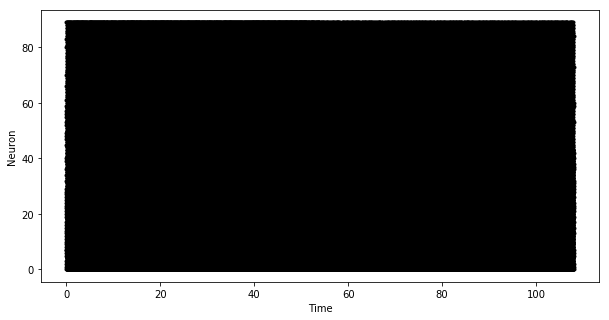

In [108]:
discrete_sim_spikes=build_features.sim_brian_spikes(duration_epochs=54000)

(900, 90, 90)


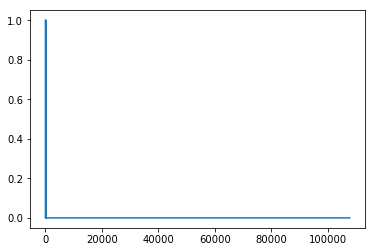

In [109]:
params['methods']=[ 'diff_frobenius']
sum_diff_corr=train_model.detect_brian_spikes_changes(discrete_sim_spikes, params)
summary_stat=sum_diff_corr['diff_frobenius']
cp_exponential=pelt(exponential(summary_stat*100), len(summary_stat))
time_pt=np.zeros(summary_stat.size * res * block_width)
change_points=np.array(cp_exponential) * res * block_width
#visualize.plot_cp_results(sum_diff_corr,stim, data_retina, params)
time_pt[change_points]=1
plt.plot(time_pt)

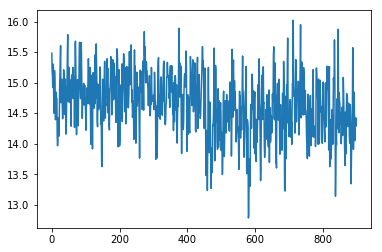

In [110]:
plt.plot(summary_stat)

In [111]:
pelt(exponential(summary_stat*10), len(summary_stat))

[0]

In [47]:
sum_diff_corr

{'diff_frobenius': array([ 0.98305242,  0.97628269,  1.30227766, ...,  1.60960938,
         1.83114332,  1.42218314])}

In [49]:
cp_exponential=pelt(exponential(summary_stat), len(summary_stat))

In [50]:
time_pt=np.zeros(summary_stat.size * res * block_width)

In [40]:
summary_stat.size

22871

In [51]:
change_points=np.array(cp_exponential) * res * block_width

In [52]:
time_pt[change_points]=1

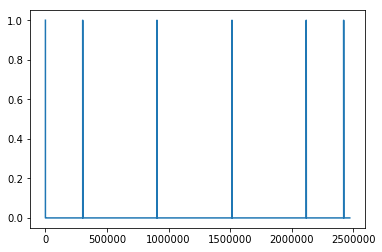

In [53]:
plt.plot(time_pt)

white64_a
fullfield_a
multiscale64_g
white64_b
fullfield_b
multiscale64_h
spatexp64_a
spatexp64_b


/Users/abhinav/anaconda/envs/py35/lib/python3.5/site-packages/matplotlib/cbook.py:136: MatplotlibDeprecationWarning: The set_color_cycle attribute was deprecated in version 1.5. Use set_prop_cycle instead.
  warnings.warn(message, mplDeprecation, stacklevel=1)


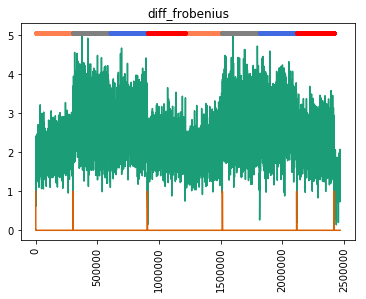

In [54]:
visualize.plot_cp_results(sum_diff_corr,stim, data_retina, params)
plt.plot(time_pt)